In [1]:
import pandas as pd

# MOVIES

Only movies with at least one rating or tag are included in the dataset.

In [2]:
movies_df = pd.read_csv('../../dataset/MovieLens_files/movies.csv')

In [3]:
movies_df.head()

movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy

# RATINGS

In [4]:
ratings_df = pd.read_csv('../../dataset/MovieLens_files/ratings.csv')

In [5]:
ratings_df.head()

userId  movieId  rating   timestamp
0       1        2     3.5  1112486027
1       1       29     3.5  1112484676
2       1       32     3.5  1112484819
3       1       47     3.5  1112484727
4       1       50     3.5  1112484580

# TAGS

In [6]:
tags_df = pd.read_csv('../../dataset/MovieLens_files/tags.csv')

In [7]:
tags_df.head()

userId  movieId            tag   timestamp
0      18     4141    Mark Waters  1240597180
1      65      208      dark hero  1368150078
2      65      353      dark hero  1368150079
3      65      521  noir thriller  1368149983
4      65      592      dark hero  1368150078

# GENOME TAGS

Provides a tag ID and the corresponding tag name.

In [8]:
genome_tags_df = pd.read_csv('../../dataset/MovieLens_files/genome-tags.csv')

In [9]:
genome_tags_df.head()

tagId           tag
0      1           007
1      2  007 (series)
2      3  18th century
3      4         1920s
4      5         1930s

# GENOME SCORES

Provides the relevance of each tag, calculated based on tags, ratings, and textual reviews.

In [10]:
genome_scores_df = pd.read_csv('../../dataset/MovieLens_files/genome-scores.csv')

In [11]:
genome_scores_df.head()

movieId  tagId  relevance
0        1      1    0.02500
1        1      2    0.02500
2        1      3    0.05775
3        1      4    0.09675
4        1      5    0.14675

# LINKS

In [12]:
links_df = pd.read_csv('../../dataset/MovieLens_files/links.csv')

In [13]:
links_df.head()

movieId  imdbId   tmdbId
0        1  114709    862.0
1        2  113497   8844.0
2        3  113228  15602.0
3        4  114885  31357.0
4        5  113041  11862.0

---

In [14]:
movies_df.head()

movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy

In [15]:
films_df = movies_df

films_df = films_df['title'].str.extract('(.*)\((\d{4})\)', expand=False)


In [16]:
films_df["movieId"] = movies_df['movieId']
films_df["genres"] = movies_df['genres']
films_df.columns = ['title', 'year', 'movieId', 'genres']


In [17]:
films_df = films_df[['movieId', 'title', 'year', 'genres']]
films_df.head()

movieId                         title  year  \
0        1                    Toy Story   1995   
1        2                      Jumanji   1995   
2        3             Grumpier Old Men   1995   
3        4            Waiting to Exhale   1995   
4        5  Father of the Bride Part II   1995   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy

In [18]:
films_df.to_csv('../../dataset/MovieLens_files/movies_curated.csv')

In [19]:
ratings_df.groupby('movieId').count().head()

userId  rating  timestamp
movieId                           
1         49695   49695      49695
2         22243   22243      22243
3         12735   12735      12735
4          2756    2756       2756
5         12161   12161      12161

In [20]:
ratings_df.groupby('movieId').count().rating.quantile([0.35,0.61,0.99])

0.35        6.00
0.61       51.00
0.99    14388.69
Name: rating, dtype: float64

In [21]:
films_df[films_df['movieId']==117630]

movieId            title  year                       genres
24917   117630  Double Trouble   1992  Action|Comedy|Crime|Romance

In [22]:
films_df.describe()

movieId
count   27278.000000
mean    59855.480570
std     44429.314697
min         1.000000
25%      6931.250000
50%     68068.000000
75%    100293.250000
max    131262.000000

In [23]:
count_ratings_df = ratings_df.groupby('movieId').count()

In [24]:
count_ratings_df = count_ratings_df[count_ratings_df['rating']>50]

In [25]:
count_ratings_df.describe()

userId        rating     timestamp
count  10473.000000  10473.000000  10473.000000
mean    1894.910436   1894.910436   1894.910436
std     4706.859706   4706.859706   4706.859706
min       51.000000     51.000000     51.000000
25%      130.000000    130.000000    130.000000
50%      362.000000    362.000000    362.000000
75%     1351.000000   1351.000000   1351.000000
max    67310.000000  67310.000000  67310.000000

In [26]:
movies_id_list = count_ratings_df.index.to_list()

In [27]:
# turning all genres into a dummy variable.

dummies = films_df['genres'].str.get_dummies(sep='|')
films_genres_df = pd.concat([films_df, dummies], axis=1)


In [28]:
films_genres_df.head()

movieId                         title  year  \
0        1                    Toy Story   1995   
1        2                      Jumanji   1995   
2        3             Grumpier Old Men   1995   
3        4            Waiting to Exhale   1995   
4        5  Father of the Bride Part II   1995   

                                        genres  (no genres listed)  Action  \
0  Adventure|Animation|Children|Comedy|Fantasy                   0       0   
1                   Adventure|Children|Fantasy                   0       0   
2                               Comedy|Romance                   0       0   
3                         Comedy|Drama|Romance                   0       0   
4                                       Comedy                   0       0   

   Adventure  Animation  Children  Comedy  ...  Film-Noir  Horror  IMAX  \
0          1          1         1       1  ...          0       0     0   
1          1          0         1       0  ...          0       0     0   
2          0          0         0       1  ...          0       0     0   
3          0          0         0       1  ...          0       0     0   
4          0          0         0       1  ...          0       0     0   

   Musical  Mystery  Romance  Sci-Fi  Thriller  War  Western  
0        0        0        0       0         0    0        0  
1        0        0        0       0         0    0        0  
2        0        0        1       0         0    0        0  
3        0        0        1       0         0    0        0  
4        0        0        0       0         0    0        0  

[5 rows x 24 columns]

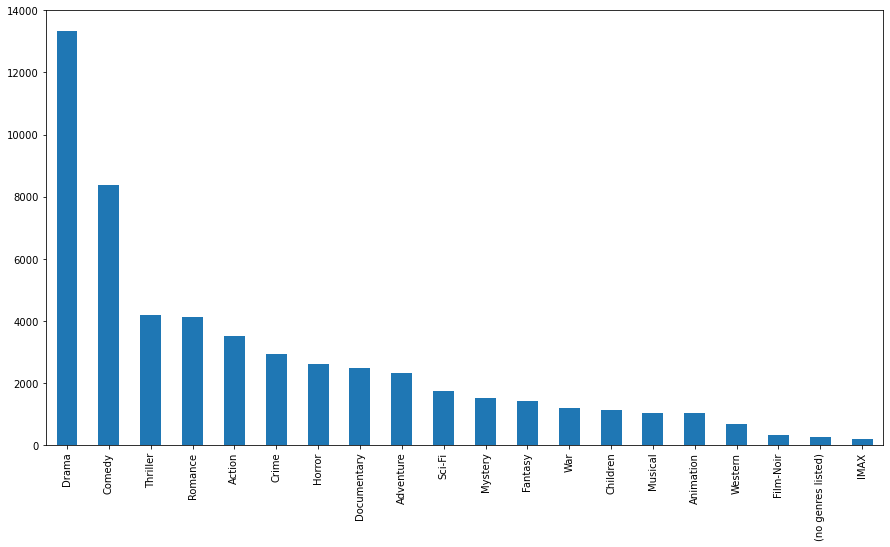

In [48]:
# Summing all genres 
films_genres_df.iloc[:, 4:].sum().sort_values(ascending=False).plot.bar(figsize=(15, 8))

# We can see that More films are of Drama, Comedy and Thriller

In [30]:
# Create column of movieId
count_ratings_df['movieId'] = count_ratings_df.index

In [31]:
# Create a dataframe that is the ONLY of the films that are rated more than 50 times

mask = films_genres_df.movieId.isin(count_ratings_df.movieId)
rated_films_df = films_genres_df[mask]
rated_films_df.head()

movieId                         title  year  \
0        1                    Toy Story   1995   
1        2                      Jumanji   1995   
2        3             Grumpier Old Men   1995   
3        4            Waiting to Exhale   1995   
4        5  Father of the Bride Part II   1995   

                                        genres  (no genres listed)  Action  \
0  Adventure|Animation|Children|Comedy|Fantasy                   0       0   
1                   Adventure|Children|Fantasy                   0       0   
2                               Comedy|Romance                   0       0   
3                         Comedy|Drama|Romance                   0       0   
4                                       Comedy                   0       0   

   Adventure  Animation  Children  Comedy  ...  Film-Noir  Horror  IMAX  \
0          1          1         1       1  ...          0       0     0   
1          1          0         1       0  ...          0       0     0   
2          0          0         0       1  ...          0       0     0   
3          0          0         0       1  ...          0       0     0   
4          0          0         0       1  ...          0       0     0   

   Musical  Mystery  Romance  Sci-Fi  Thriller  War  Western  
0        0        0        0       0         0    0        0  
1        0        0        0       0         0    0        0  
2        0        0        1       0         0    0        0  
3        0        0        1       0         0    0        0  
4        0        0        0       0         0    0        0  

[5 rows x 24 columns]

In [32]:
rated_films_df['num_genres'] = rated_films_df.iloc[:, 4:].sum(axis=1)

<ipython-input-32-e615fea0e0d9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rated_films_df['num_genres'] = rated_films_df.iloc[:, 4:].sum(axis=1)


In [33]:
rated_films_df.head()

movieId                         title  year  \
0        1                    Toy Story   1995   
1        2                      Jumanji   1995   
2        3             Grumpier Old Men   1995   
3        4            Waiting to Exhale   1995   
4        5  Father of the Bride Part II   1995   

                                        genres  (no genres listed)  Action  \
0  Adventure|Animation|Children|Comedy|Fantasy                   0       0   
1                   Adventure|Children|Fantasy                   0       0   
2                               Comedy|Romance                   0       0   
3                         Comedy|Drama|Romance                   0       0   
4                                       Comedy                   0       0   

   Adventure  Animation  Children  Comedy  ...  Horror  IMAX  Musical  \
0          1          1         1       1  ...       0     0        0   
1          1          0         1       0  ...       0     0        0   
2          0          0         0       1  ...       0     0        0   
3          0          0         0       1  ...       0     0        0   
4          0          0         0       1  ...       0     0        0   

   Mystery  Romance  Sci-Fi  Thriller  War  Western  num_genres  
0        0        0       0         0    0        0           5  
1        0        0       0         0    0        0           3  
2        0        1       0         0    0        0           2  
3        0        1       0         0    0        0           3  
4        0        0       0         0    0        0           1  

[5 rows x 25 columns]

In [35]:
rated_films_df = rated_films_df.join(ratings_df['rating'], on='movieId', how='left')

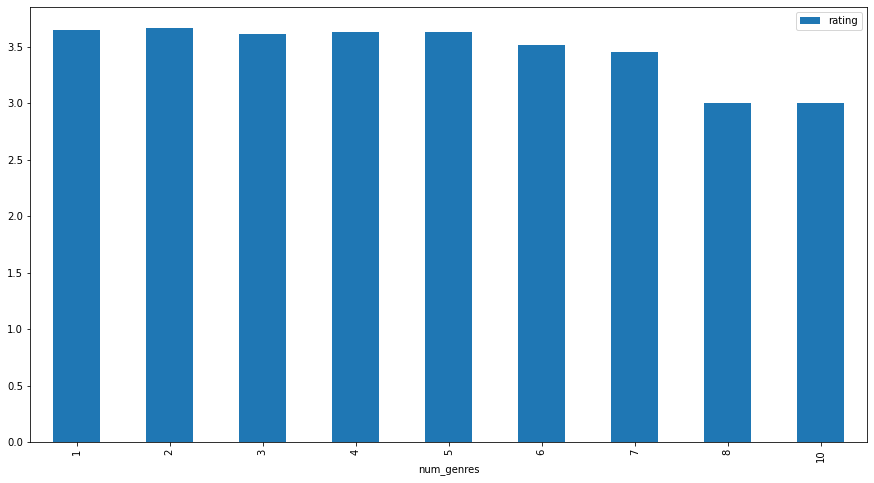

In [47]:
rated_films_df[['num_genres', 'rating']].groupby('num_genres').mean().plot.bar(figsize=(15, 8))

In [37]:
rated_films_df[['num_genres', "rating"]].corr()

num_genres    rating
num_genres    1.000000 -0.013366
rating       -0.013366  1.000000

In [38]:
ratings_df.groupby('movieId').count().mean()

userId       747.841123
rating       747.841123
timestamp    747.841123
dtype: float64

In [39]:
# genres that have highest average ratings

# most common genres over the years 


In [40]:
# most common genres over the years 

films_genres_df.iloc[:,4:].sum().sort_values()

IMAX                    196
(no genres listed)      246
Film-Noir               330
Western                 676
Animation              1027
Musical                1036
Children               1139
War                    1194
Fantasy                1412
Mystery                1514
Sci-Fi                 1743
Adventure              2329
Documentary            2471
Horror                 2611
Crime                  2939
Action                 3520
Romance                4127
Thriller               4178
Comedy                 8374
Drama                 13344
dtype: int64

In [41]:
films_genres_df.head()

movieId                         title  year  \
0        1                    Toy Story   1995   
1        2                      Jumanji   1995   
2        3             Grumpier Old Men   1995   
3        4            Waiting to Exhale   1995   
4        5  Father of the Bride Part II   1995   

                                        genres  (no genres listed)  Action  \
0  Adventure|Animation|Children|Comedy|Fantasy                   0       0   
1                   Adventure|Children|Fantasy                   0       0   
2                               Comedy|Romance                   0       0   
3                         Comedy|Drama|Romance                   0       0   
4                                       Comedy                   0       0   

   Adventure  Animation  Children  Comedy  ...  Film-Noir  Horror  IMAX  \
0          1          1         1       1  ...          0       0     0   
1          1          0         1       0  ...          0       0     0   
2          0          0         0       1  ...          0       0     0   
3          0          0         0       1  ...          0       0     0   
4          0          0         0       1  ...          0       0     0   

   Musical  Mystery  Romance  Sci-Fi  Thriller  War  Western  
0        0        0        0       0         0    0        0  
1        0        0        0       0         0    0        0  
2        0        0        1       0         0    0        0  
3        0        0        1       0         0    0        0  
4        0        0        0       0         0    0        0  

[5 rows x 24 columns]

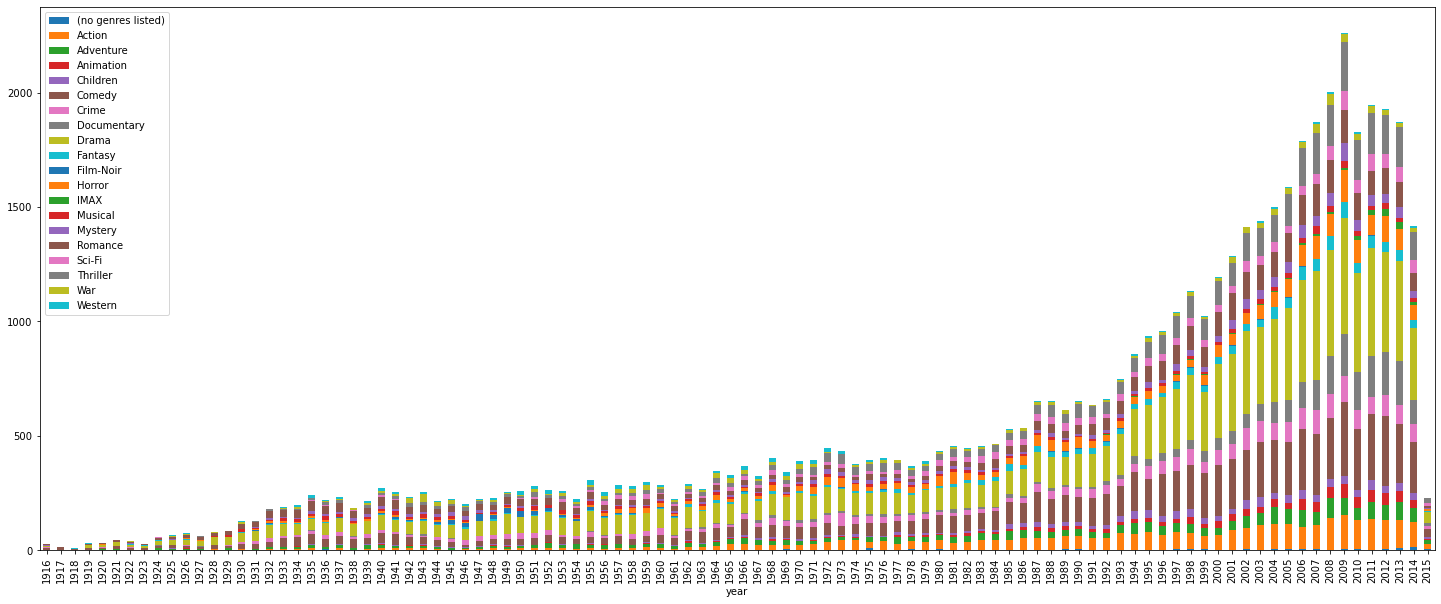

In [43]:
films_genres_df.groupby('year').sum().iloc[-100:,1:].plot.bar(stacked=True,figsize=(25, 10))

In [44]:
for genre in rated_films_df.iloc[:,4:-2]:
    print(rated_films_df[rated_films_df[genre]==1].groupby(genre).mean()['rating'])

Series([], Name: rating, dtype: float64)
Action
1    3.629145
Name: rating, dtype: float64
Adventure
1    3.624263
Name: rating, dtype: float64
Animation
1    3.596774
Name: rating, dtype: float64
Children
1    3.615016
Name: rating, dtype: float64
Comedy
1    3.644719
Name: rating, dtype: float64
Crime
1    3.621451
Name: rating, dtype: float64
Documentary
1    3.628631
Name: rating, dtype: float64
Drama
1    3.647282
Name: rating, dtype: float64
Fantasy
1    3.636879
Name: rating, dtype: float64
Film-Noir
1    3.74569
Name: rating, dtype: float64
Horror
1    3.64424
Name: rating, dtype: float64
IMAX
1    3.512346
Name: rating, dtype: float64
Musical
1    3.663855
Name: rating, dtype: float64
Mystery
1    3.623604
Name: rating, dtype: float64
Romance
1    3.632517
Name: rating, dtype: float64
Sci-Fi
1    3.617092
Name: rating, dtype: float64
Thriller
1    3.621296
Name: rating, dtype: float64
War
1    3.733836
Name: rating, dtype: float64
Western
1    3.735683
Name: rating, dtype: flo